In [19]:
from sklearn.neighbors import KNeighborsClassifier
import csv
import pickle
import re
from datetime import datetime
import numpy as np
# randn = np.random.randn
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import linregress
from pylab import *
from urllib import urlopen
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# page = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data")

votes = read_csv('votes.csv', header=0)
votes.head(10)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


## Challenge 01 (completed)

In [3]:
len(votes)

435

In [4]:
for c in votes.columns:
    if c <> u'Class Name':
        votes[c] = votes[c].map({'y': 1, 'n': 0})

In [5]:
votes.columns

Index([u'Class Name', u'handicapped-infants', u'water-project-cost-sharing', u'adoption-of-the-budget-resolution', u'physician-fee-freeze', u'el-salvador-aid', u'religious-groups-in-schools', u'anti-satellite-test-ban', u'aid-to-nicaraguan-contras', u'mx-missile', u'immigration', u'synfuels-corporation-cutback', u'education-spending', u'superfund-right-to-sue', u'crime', u'duty-free-exports', u'export-administration-act-south-africa'], dtype='object')

In [6]:
(votes['Class Name'] == 'republican').sum()

168

In [7]:
(votes['Class Name'] == 'democrat').sum()

267

In [8]:
nan_d = []
nan_r = []
yes_d = []
yes_r = []
dem_votes = {}
rep_votes = {}
for c in votes.columns:
    if c <> u'Class Name':
        nan_dem = pd.isnull(votes[c][votes['Class Name'] == 'democrat']).sum()
        nan_rep = pd.isnull(votes[c][votes['Class Name'] == 'republican']).sum()
        yes_dem = (votes[c][votes['Class Name'] == 'democrat']).sum()/(267 - nan_dem)
        yes_rep = (votes[c][votes['Class Name'] == 'republican']).sum()/(168 - nan_rep)
        dem_votes.setdefault(c, [])
        rep_votes.setdefault(c, [])
        if yes_dem >= 0.5:
            dem_votes[c].append(1)
        else:
            dem_votes[c].append(0)

        if yes_rep >=0.5:
            rep_votes[c].append(1)
        else:
            rep_votes[c].append(0)
        nan_d.append(nan_dem)
        nan_r.append(nan_rep)
        yes_d.append((votes[c][votes['Class Name'] == 'democrat']).sum())
        yes_r.append((votes[c][votes['Class Name'] == 'republican']).sum())


In [9]:
dem_votes

{'adoption-of-the-budget-resolution': [1],
 'aid-to-nicaraguan-contras': [1],
 'anti-satellite-test-ban': [1],
 'crime': [0],
 'duty-free-exports': [1],
 'education-spending': [0],
 'el-salvador-aid': [0],
 'export-administration-act-south-africa': [1],
 'handicapped-infants': [1],
 'immigration': [0],
 'mx-missile': [1],
 'physician-fee-freeze': [0],
 'religious-groups-in-schools': [0],
 'superfund-right-to-sue': [0],
 'synfuels-corporation-cutback': [1],
 'water-project-cost-sharing': [1]}

In [10]:
rep_votes

{'adoption-of-the-budget-resolution': [0],
 'aid-to-nicaraguan-contras': [0],
 'anti-satellite-test-ban': [0],
 'crime': [1],
 'duty-free-exports': [0],
 'education-spending': [1],
 'el-salvador-aid': [1],
 'export-administration-act-south-africa': [1],
 'handicapped-infants': [0],
 'immigration': [1],
 'mx-missile': [0],
 'physician-fee-freeze': [1],
 'religious-groups-in-schools': [1],
 'superfund-right-to-sue': [1],
 'synfuels-corporation-cutback': [0],
 'water-project-cost-sharing': [1]}

In [11]:
for c in votes.columns:
    if c <> u'Class Name':
        for r in range(len(votes)):
            if pd.isnull(votes[c][r]):
                if votes['Class Name'][r] == 'democrat':
                    votes[c][r] = dem_votes[c][0]
                else:
                    votes[c][r] = rep_votes[c][0]


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
votes.head(10)

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
6,democrat,0,1,0,1,1,1,0,0,0,0,0,0,0,1,1,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
9,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1


## Challenge 02 (completed)

In [13]:
from sklearn import cross_validation
X = votes.drop('Class Name', 1)
y = votes['Class Name']

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=0)

print X.shape, X_train.shape, X_test.shape

(435, 16) (326, 16) (109, 16)


## Challenge 03 (completed)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [15]:
acc_scores = {}
for n in range(20):
    clf = KNeighborsClassifier(n_neighbors=(n+1)).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores.setdefault((n+1), [])
    acc_scores[(n+1)].append(accuracy_score(y_test, y_pred))


In [16]:
print acc_scores

{1: [0.90825688073394495], 2: [0.92660550458715596], 3: [0.94495412844036697], 4: [0.94495412844036697], 5: [0.94495412844036697], 6: [0.94495412844036697], 7: [0.94495412844036697], 8: [0.94495412844036697], 9: [0.94495412844036697], 10: [0.94495412844036697], 11: [0.93577981651376152], 12: [0.94495412844036697], 13: [0.94495412844036697], 14: [0.93577981651376152], 15: [0.92660550458715596], 16: [0.93577981651376152], 17: [0.92660550458715596], 18: [0.92660550458715596], 19: [0.90825688073394495], 20: [0.91743119266055051]}


In [17]:
max(acc_scores, key=acc_scores.get)

3

## Challenge 04 (completed)

In [21]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.97247706422018354

## Challenge 05 (completed)

Populating the interactive namespace from numpy and matplotlib


<Container object of 2 artists>

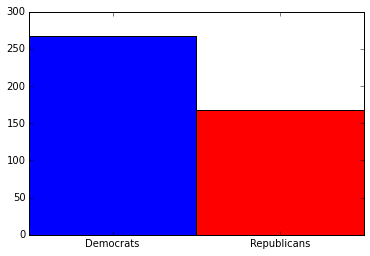

In [46]:
%pylab inline
parties = ['Democrats', 'Republicans']
voters = []
voters.append((votes['Class Name'] == 'democrat').sum())
voters.append((votes['Class Name'] == 'republican').sum())
pos = np.arange(len(parties))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(parties)
plt.bar(pos, voters, width, color=['blue', 'red'])

## Challenge 06

## Challenge 07

In [ ]:
from sklearn.learning_curve import learning_curve